In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [5]:
# Load the Dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)

In [6]:
print(f"Shape of dataset: {data.shape}")

Shape of dataset: (569, 32)


In [7]:
# Check for duplicate rows
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


In [8]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


In [9]:
# Drop non-numeric columns
data.drop('ID', axis=1, inplace=True)

In [10]:
# Encode Labels: Encoding 'Diagnosis' column (1 for Malignant, 0 for Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

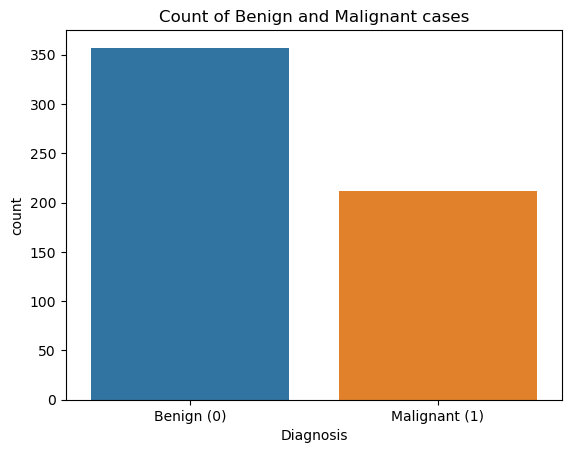

In [11]:
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.show()

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64
No missing values found in the dataset.


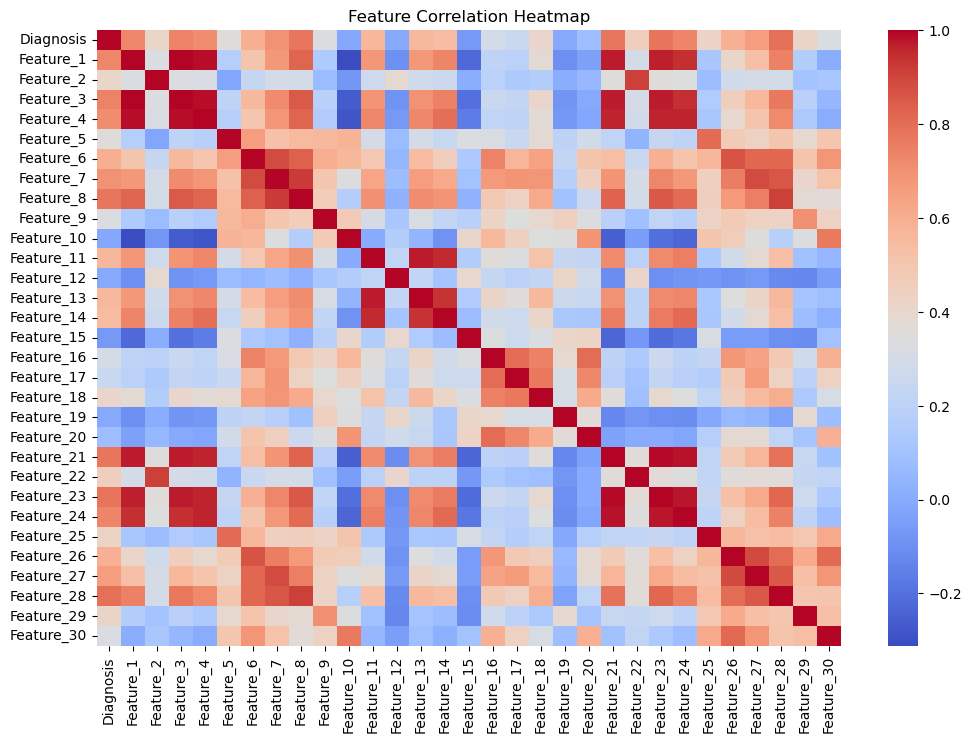

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


In [16]:
num_outliers_per_column = outliers.sum()

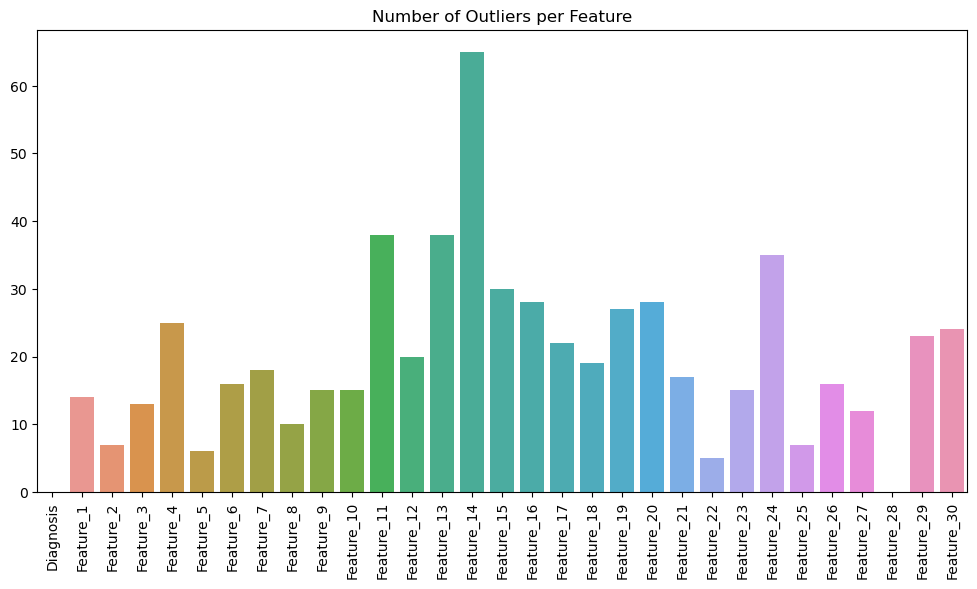

In [17]:
# Visualize the number of outliers per feature
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.show()

In [18]:
# Remove outliers from the dataset
data_no_outliers = data[~outliers.any(axis=1)]


In [19]:
# Split data into features and labels
X = data_no_outliers.drop('Diagnosis', axis=1)
y = data_no_outliers['Diagnosis']

In [20]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.964461   0.377377   1.973596   2.108920   0.112751   0.650915   
1   0.134540   0.594978   0.225722   0.033027   2.126689   2.239566   
2   1.065623   1.211941   0.968866   1.020884  -0.930314  -0.560180   
3   0.968887  -0.157666   1.022372   0.945414   0.317713   1.229127   
4   0.997102   1.393701   1.028317   0.953051  -0.768502   0.399021   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0   1.066356   1.488638   0.277054   -0.756789  ...    2.413510    0.521788   
1   0.677832   0.935739   2.210386    2.655183  ...    0.610898    0.607065   
2  -0.560181  -0.104415  -1.002217   -0.846630  ...    1.270617    1.626840   
3   0.797817   1.178389   0.507899   -0.077988  ...    1.651581    0.454277   
4   0.794553   0.693088   0.531946   -1.563363  ...    0.542758    0.521788   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.468580    2.66

In [22]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#applying smote
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_classifier = AdaBoostClassifier(
   estimator=DecisionTreeClassifier(max_depth=1),  # Base estimator
    n_estimators=50,
    learning_rate=1.0,
    algorithm="SAMME",
    random_state=42
)

ada_classifier.fit(X_train_smote, y_train_smote)
# Calculate evaluation metrics
from sklearn.metrics import f1_score
y_pred = ada_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
from tabulate import tabulate

# Model performance metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table in a boxed format
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Display Confusion Matrix in a boxed format
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="grid"))


Model Performance Metrics:
+----+-----------+----------+
|    | Metric    |    Score |
+====+===========+==========+
|  0 | Accuracy  | 0.9625   |
+----+-----------+----------+
|  1 | Precision | 0.958333 |
+----+-----------+----------+
|  2 | Recall    | 0.92     |
+----+-----------+----------+
|  3 | F1 Score  | 0.938776 |
+----+-----------+----------+

Confusion Matrix:
+----------+---------------+---------------+
|          |   Predicted 0 |   Predicted 1 |
+==========+===============+===============+
| Actual 0 |            54 |             1 |
+----------+---------------+---------------+
| Actual 1 |             2 |            23 |
+----------+---------------+---------------+


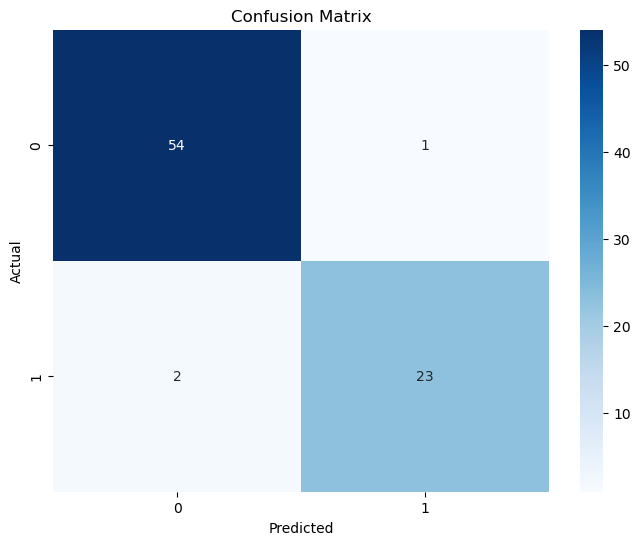

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

In [26]:
# Perform Grid Search with Cross Validation
!pip install --upgrade scikit-learn
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ada_classifier,  
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=5,
                            n_jobs=-1,
                            verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [27]:
# Best Parameters and Model
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters from Grid Search:
{'estimator__max_depth': 2, 'learning_rate': 1.5, 'n_estimators': 150}


In [28]:
y_pred_best = best_model.predict(X_test)

In [29]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

In [30]:
from tabulate import tabulate

# Model performance metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy_best, precision_best, recall_best, f1_best]
}

# Convert metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table in a boxed format
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Display Confusion Matrix in a boxed format
conf_matrix_df = pd.DataFrame(conf_matrix_best, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="grid"))


Model Performance Metrics:
+----+-----------+----------+
|    | Metric    |    Score |
+====+===========+==========+
|  0 | Accuracy  | 0.95     |
+----+-----------+----------+
|  1 | Precision | 0.956522 |
+----+-----------+----------+
|  2 | Recall    | 0.88     |
+----+-----------+----------+
|  3 | F1 Score  | 0.916667 |
+----+-----------+----------+

Confusion Matrix:
+----------+---------------+---------------+
|          |   Predicted 0 |   Predicted 1 |
+==========+===============+===============+
| Actual 0 |            54 |             1 |
+----------+---------------+---------------+
| Actual 1 |             3 |            22 |
+----------+---------------+---------------+


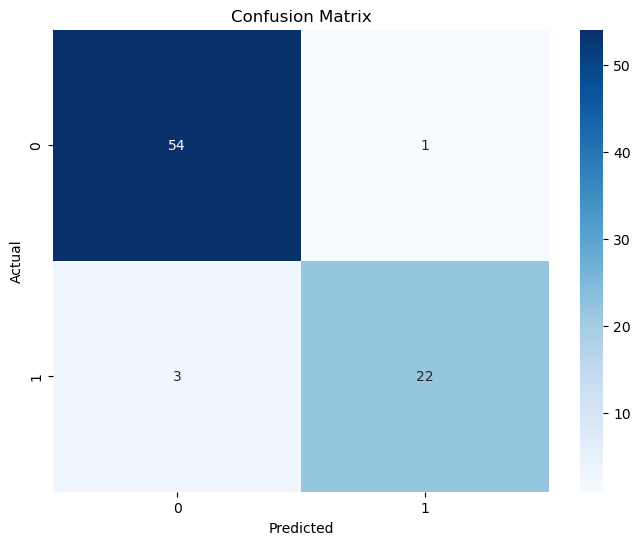

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


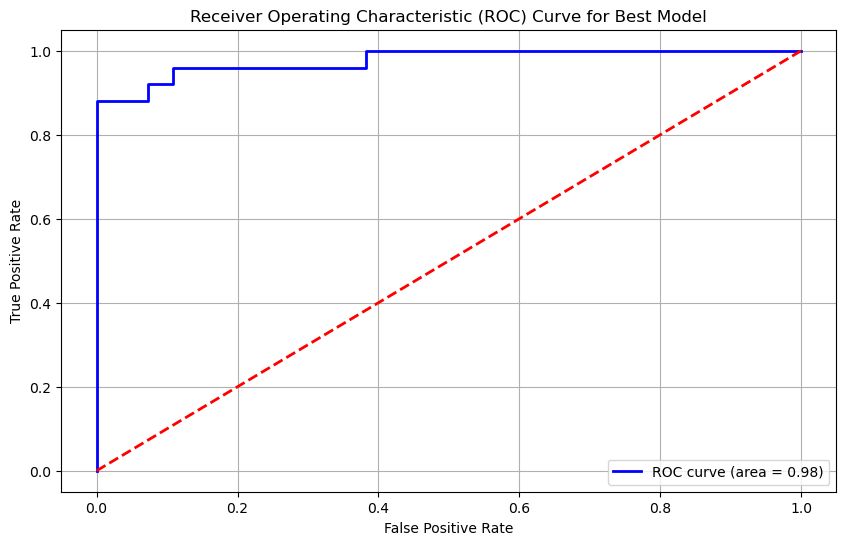

In [32]:
# ROC Curve for the Best Model
# Get predicted probabilities
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# Calculate ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
# Calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()